In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Y69K4HR1sTWT9GUq1Dk1")
project = rf.workspace("project-r2a3i").project("eg-currency-fcuw3")
version = project.version(1)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 1.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 2.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 29.1 MB/s eta 0:00:0000:0100:01m
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.12.1
  Attempting uninstall: certifi
    Found existing install


Extracting Dataset Version Zip to eg-currency-1 in yolov8:: 100%|██████████| 13732/13732 [00:02<00:00, 4768.39it/s]


In [5]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.6 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5597.8/8062.4 GB disk)


In [12]:
# Define a function to write text to a file
def write_text_to_file(text, file_path):
    with open(file_path, 'w') as file:
        file.write(text)


text="""
names:
- 0.25 pound m
- 0.25 pound
- 0.50 pound m
- 0.50 pound
- 1 pound m
- 1 pound
- 10 pound new
- 10 pound
- 100 pounds
- 20 pounds
- 200 pounds
- 5 pounds
- 50 pounds
nc: 13
roboflow:
  license: CC BY 4.0
  project: eg-currency-fcuw3
  url: https://universe.roboflow.com/project-r2a3i/eg-currency-fcuw3/dataset/1
  version: 1
  workspace: project-r2a3i
test: /kaggle/working/eg-currency-1/test/images
train: /kaggle/working/eg-currency-1/train/images
val: /kaggle/working/eg-currency-1/valid/images

"""

write_text_to_file(text, "/kaggle/working/eg-currency-1/data.yaml")

In [13]:
# Train YOLOv8n on COCO8 for 10 epochs
!yolo task= detect mode= train data=/kaggle/working/eg-currency-1/data.yaml model=yolov8n.pt epochs=15 imgsz=640 batch=16

Ultralytics YOLOv8.2.6 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/eg-currency-1/data.yaml, epochs=15, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True

In [14]:
from IPython.display import Image, display

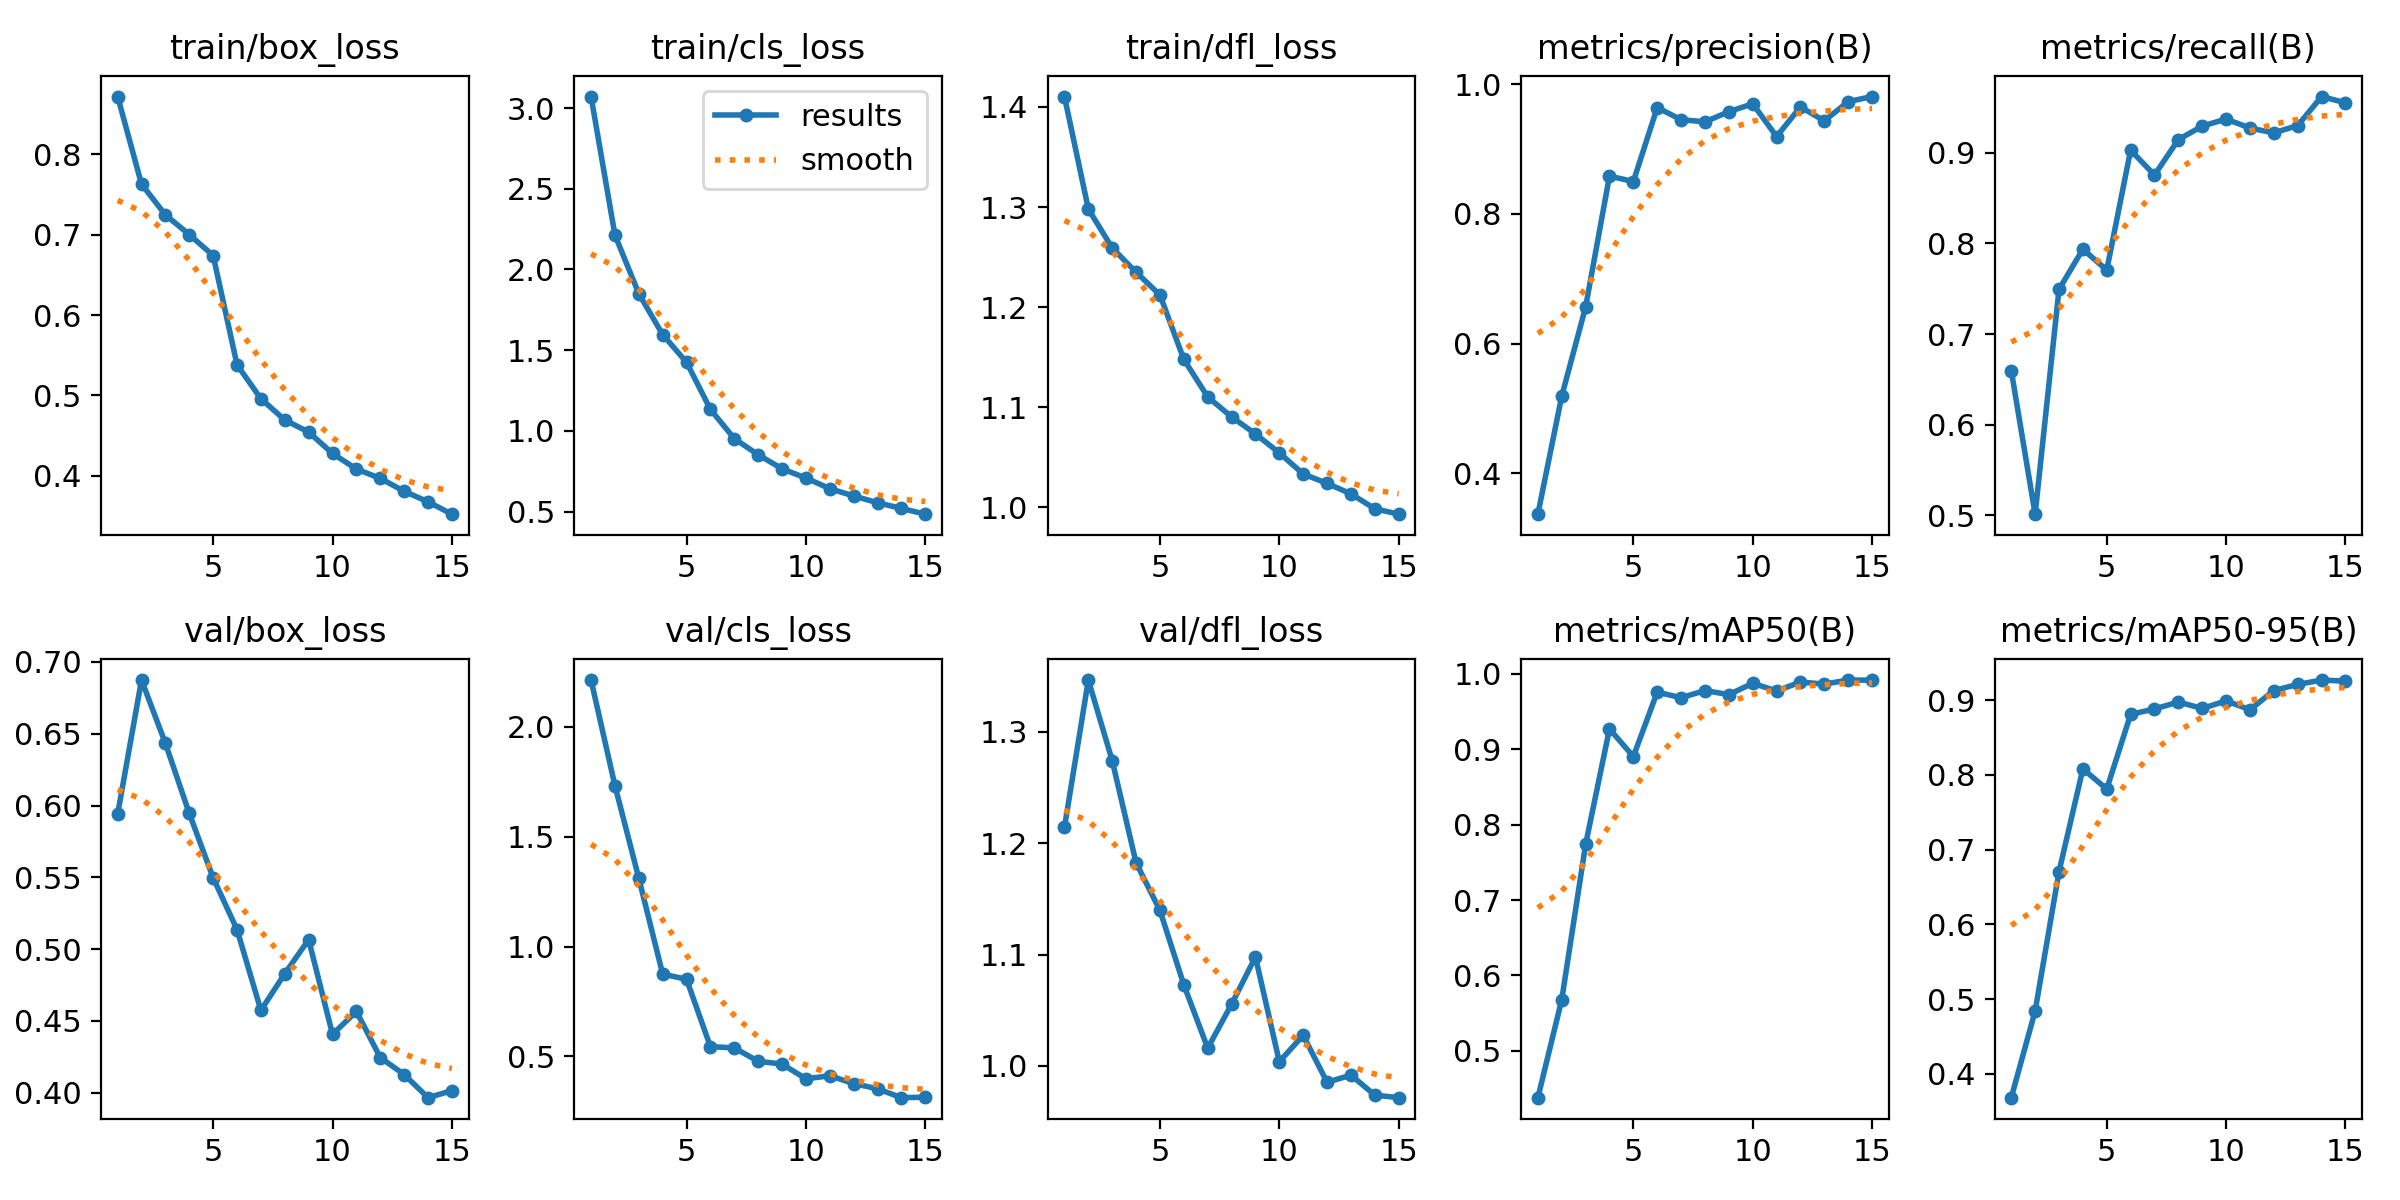

In [15]:
display(Image(filename=f"/kaggle/working/runs/detect/train4/results.png", width=1000))

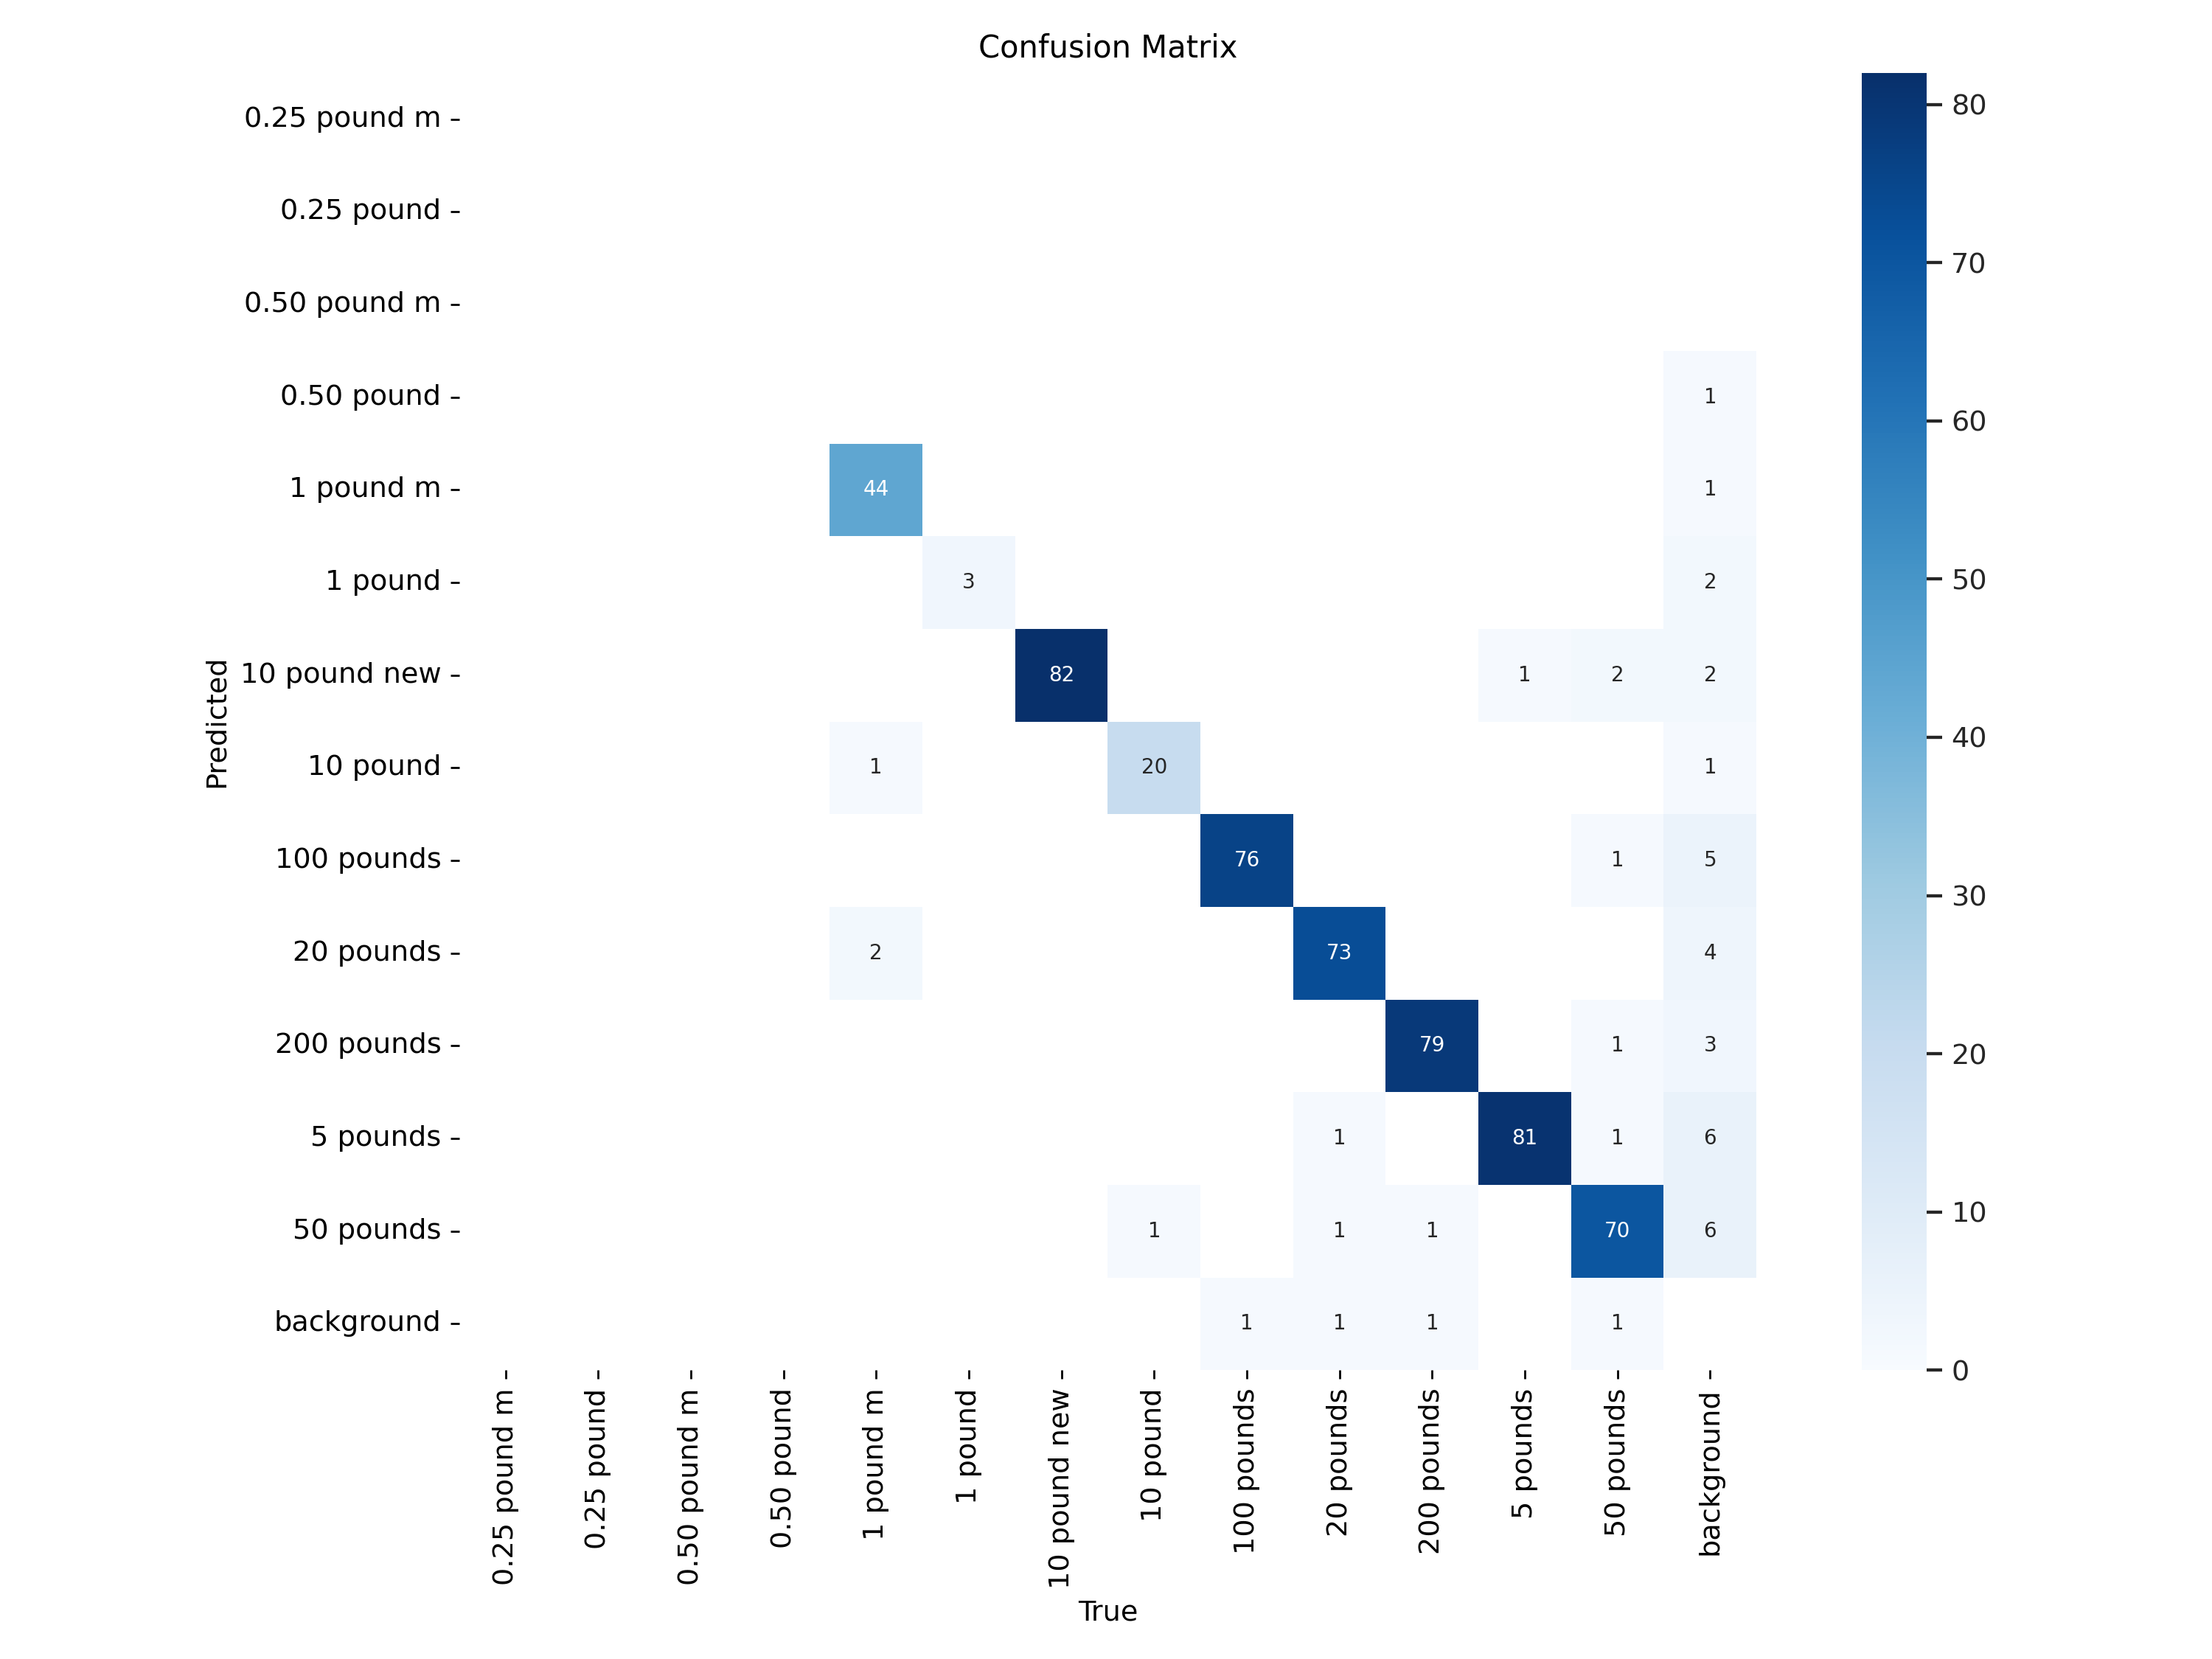

In [16]:
display(Image(filename=f"/kaggle/working/runs/detect/train4/confusion_matrix.png", width=1000))

In [17]:
!yolo task=detect mode=predict model=/kaggle/working/runs/detect/train4/weights/best.pt imgsz=640 conf=0.5 \
source=/kaggle/working/eg-currency-1/test/images

Ultralytics YOLOv8.2.6 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3008183 parameters, 0 gradients, 8.1 GFLOPs

image 1/274 /kaggle/working/eg-currency-1/test/images/-trashed-1672168926-IMG20221127212023_jpg.rf.b7d3a802231b1d410f17e493c7a30638.jpg: 640x640 1 10 pound new, 7.4ms
image 2/274 /kaggle/working/eg-currency-1/test/images/0472e230-140a-40b6-b961-9be760486317_jpg.rf.c5fad447478c94099195517714c16dae.jpg: 640x640 1 100 pounds, 7.6ms
image 3/274 /kaggle/working/eg-currency-1/test/images/1888a60c-66c5-4bd5-b03c-80d0d8bcfe26_jpg.rf.26cb15ed90425d1d1bb937734f5bc5c6.jpg: 640x640 1 50 pounds, 7.3ms
image 4/274 /kaggle/working/eg-currency-1/test/images/20-egyptian-pounds-old-banknote-denominations-of-twenty-egp-symbol-HGPG64_jpg.rf.219a1a9d3d9a237e6e9affae2a9ddd21.jpg: 640x640 1 20 pounds, 7.3ms
image 5/274 /kaggle/working/eg-currency-1/test/images/20-pounds-banknote-mohammed-ali-mosque-and-egypt-2001-eh3bkd_jpg.rf.581361b6d9fc8338e47594e5

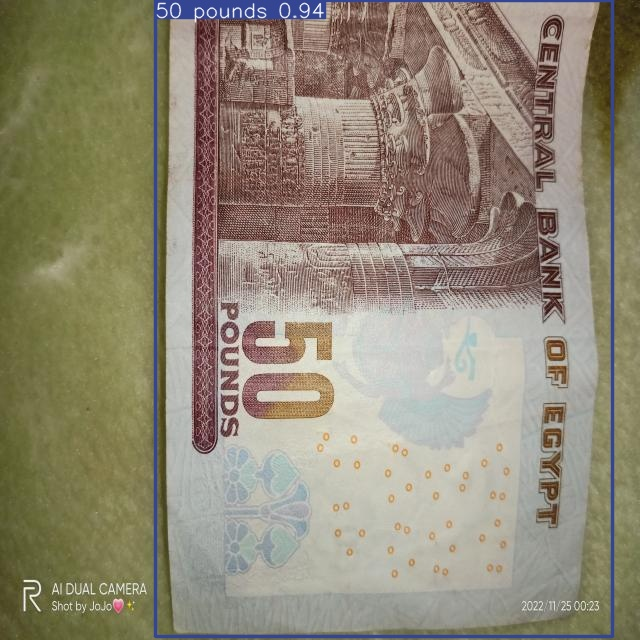

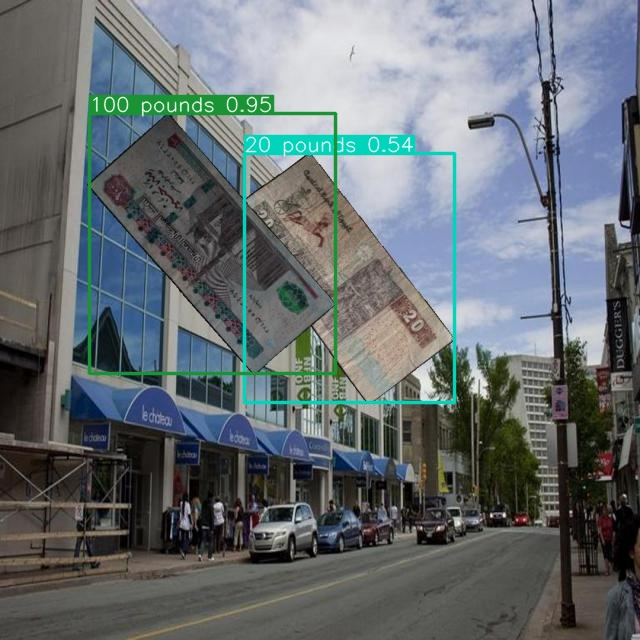

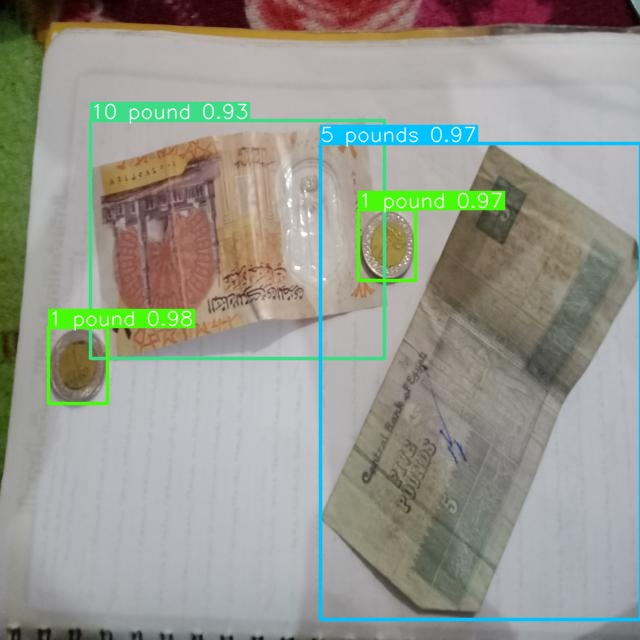

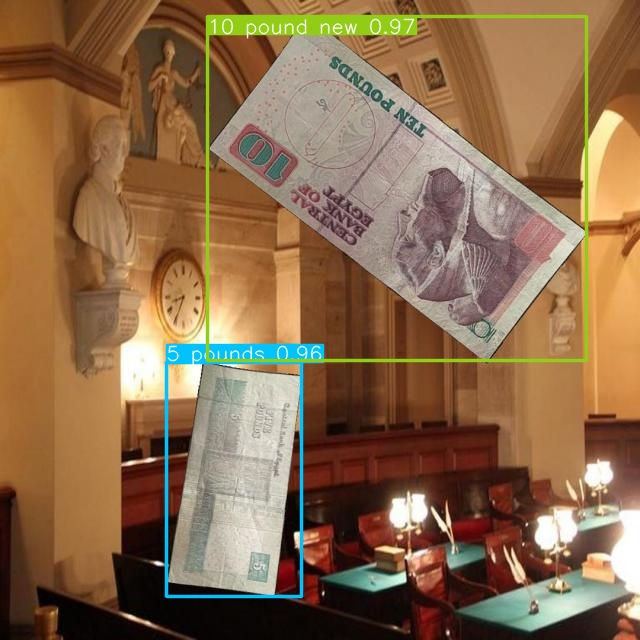

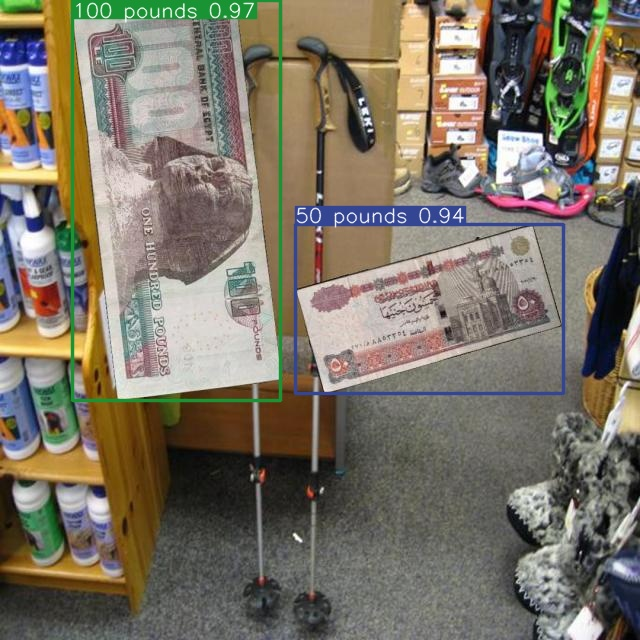

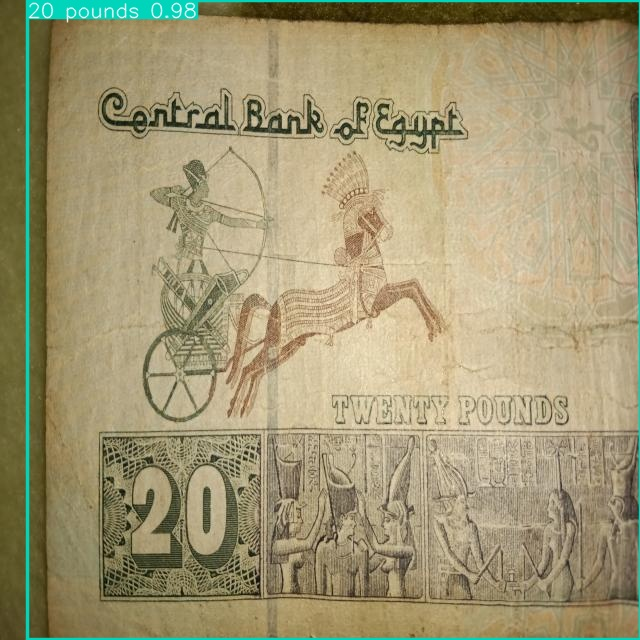

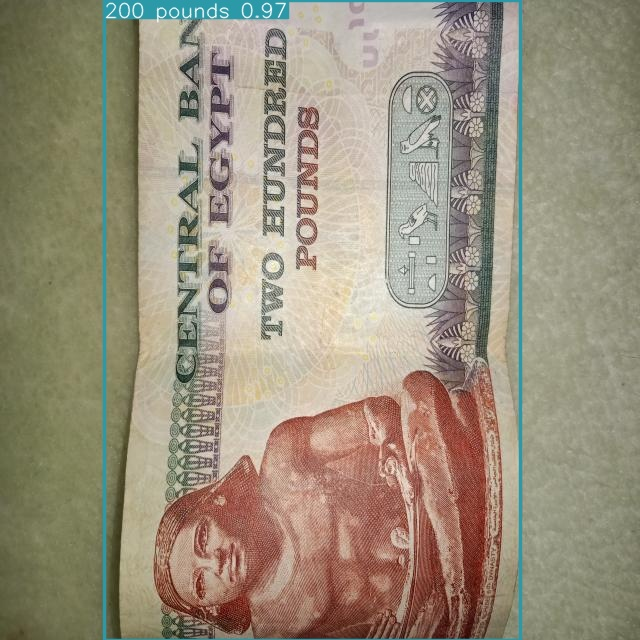

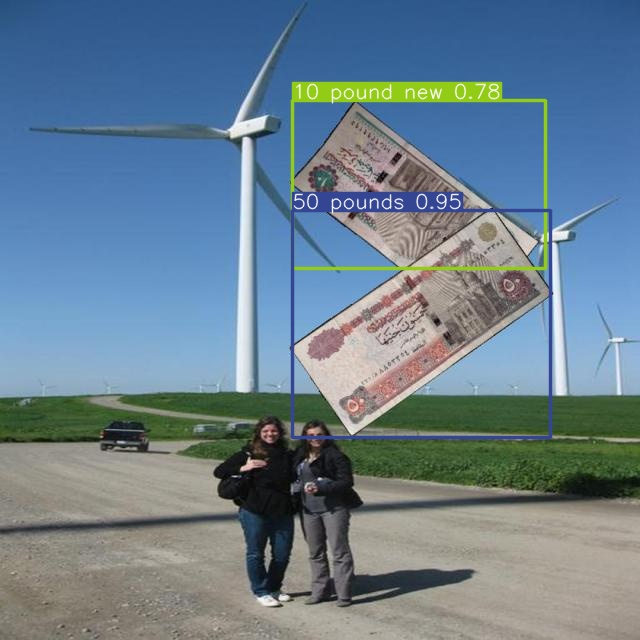

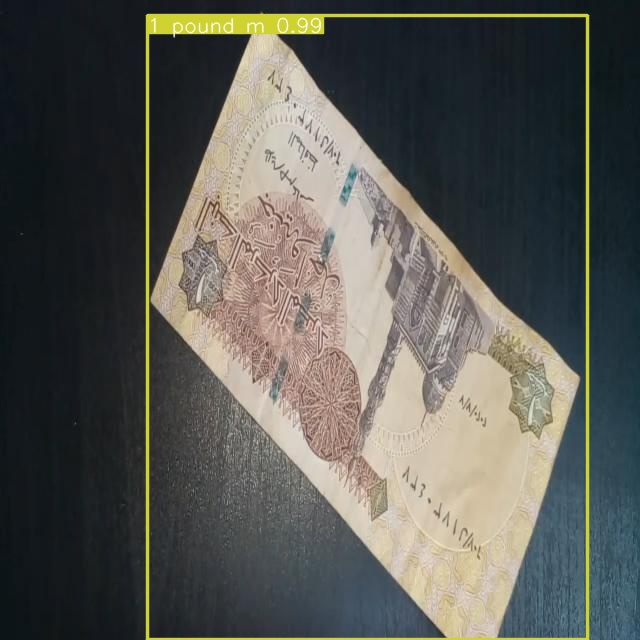

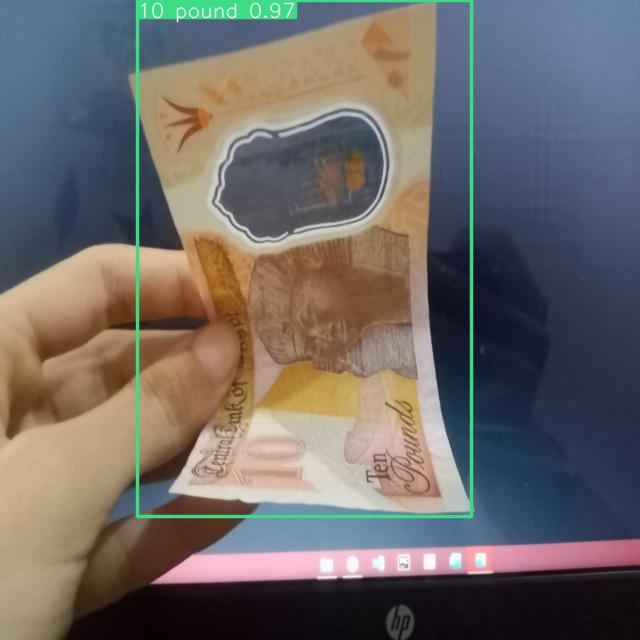

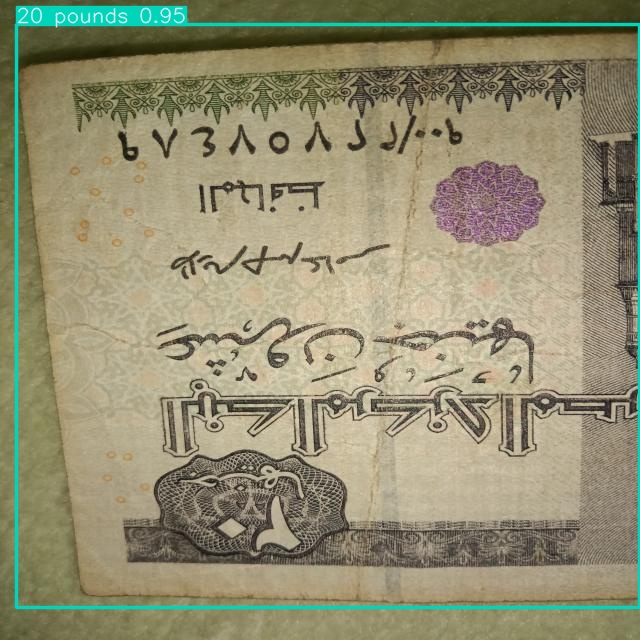

In [18]:
# Display inference on ALL test images
import glob
from IPython.display import Image, display
i = 0
for imageName in glob.glob("/kaggle/working/runs/detect/predict/*.jpg"): #assuming JPG
    if i %25 ==0 :
        print("\n")
        display(Image(filename=imageName))
    i = i +1



In [3]:
import cv2
from ultralytics import YOLO

# Load the YOLOv8 model
model = YOLO('best.pt')

# Open the video file
cap = cv2.VideoCapture(0)
names = model.model.names

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()
    if success:
        # Flip the frame horizontally
        frame_flipped = cv2.flip(frame, 1)

        # Run YOLOv8 on the flipped frame
        results = model(frame_flipped)

        for result in results[0].boxes.cpu().numpy():
            x1, y1, x2, y2 = map(int, result.xyxy[0])
            cls = names[int(result.cls[0])]
            conf = result.conf[0].round(2)

            # Adjust text position for the flipped image
            text_pos = (frame_flipped.shape[1] - x2, y1)
            conf_pos = (frame_flipped.shape[1] - x1, y2)

            cv2.rectangle(frame_flipped, (x1, y1), (x2, y2), (0,0,255), 2)

            # Visualize the results on the flipped frame
            cv2.putText(frame_flipped, cls, text_pos, fontFace=cv2.FONT_HERSHEY_SIMPLEX,thickness=2,
                        fontScale=2, color=(0,0,255))
            cv2.putText(frame_flipped, str(conf), conf_pos, fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                        fontScale=1, color=(0,0,255))

        # Display the annotated flipped frame
        cv2.imshow("Egypt Money", frame_flipped)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object and close the display window
cap.release()
cv2.destroyAllWindows()


0: 480x640 (no detections), 143.8ms
Speed: 3.7ms preprocess, 143.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 222.8ms
Speed: 7.6ms preprocess, 222.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 160.4ms
Speed: 7.9ms preprocess, 160.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 140.4ms
Speed: 4.6ms preprocess, 140.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 5 pounds, 156.0ms
Speed: 4.5ms preprocess, 156.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 5 pounds, 158.9ms
Speed: 5.0ms preprocess, 158.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 5 pounds, 172.9ms
Speed: 4.5ms preprocess, 172.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 5 pounds, 160.1ms
Speed: 3.0ms preprocess, 160.1ms infer